In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

# Load data from main datafiles

In [3]:

# dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)

In [22]:
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)
dfCase = dfCase.iloc[:-2]
dfCase['NewPositive'] = pd.to_numeric(dfCase['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['Tested'] = pd.to_numeric(dfCase['Tested'].astype(str).apply(lambda x: x.replace('.','')))
dfCase['PosPct'] = pd.to_numeric(dfCase['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
dfCase['Date'] =  pd.to_datetime(dfCase.Date,format='%Y-%m-%d')
testDates = dfCase['Date']

dfAdm = pd.read_csv(latestdir+'/Newly_admitted_over_time.csv',delimiter = ';',dtype=str)
dfAdm['Dato'] = pd.to_datetime(dfAdm['Dato'])
dfAdm['Total'] = pd.to_numeric(dfAdm['Total'])
dfAdm.tail()


dfDea = pd.read_csv(latestdir+'/Deaths_over_time.csv',delimiter = ';',dtype=str)
dfDea = dfDea.iloc[:-1,:]
dfDea['Dato'] = pd.to_datetime(dfDea['Dato'])
dfDea['Antal_døde'] = pd.to_numeric(dfDea['Antal_døde'])
dfDea.tail()

dfCase.tail()

,Date,NewPositive,NotPrevPos,PosPct,PrevPos,Tested,Tested_kumulativ
800,2022-04-06,2767,16.847,16.4,5.786,22633,66.744.941
801,2022-04-07,2716,17.765,15.3,6.340,24105,66.769.046
802,2022-04-08,2238,13.691,16.3,4.745,18436,66.787.482
803,2022-04-09,1738,9.780,17.8,3.568,13348,66.800.830
804,2022-04-10,1609,8.712,18.5,3.064,11776,66.812.606


In [23]:
allDates = dfCase.Date
allDatesAdm = dfAdm.Dato
allDatesDea = dfDea.Dato

allCases = dfCase.NewPositive.values
allAdms = dfAdm.Total.values
allDeas = dfDea['Antal_døde'].values

firstDate = np.datetime64('2021-10-01')-np.timedelta64(1,'D')
# lastDate = np.datetime64('2022-03-01')+np.timedelta64(1,'D')
lastDate = np.datetime64('2022-03-01')
lastDate = np.datetime64('today')

meanWidth = 7

# Load reinfection data

In [24]:
# latestsubdir = list(os.walk(path_dash))[0][1][-1]
# list(os.walk(path_dash))[0][1][-1]
# dfReinfFile
# dfReinfFile['Type af tilfælde (reinfektion eller første infektion)']
# dfReinfFile

In [25]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfReinfFile = pd.read_csv(latestdir+'/Regionalt_DB/24_reinfektioner_daglig_region.csv',encoding='latin1',delimiter = ';')
dfReinfFile['Prøvedato'] = pd.to_datetime(dfReinfFile['Prøvedato'])
# groupdf = df.groupby(['Prøvedato').sum()
# df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
# df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller bekræftet tilfælde)'] != '1.Reinfektion'].groupby('Prøvedato').sum()
df_reinf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] == '1.Reinfektion'].groupby('Prøvedato').sum()
df_inf = dfReinfFile[dfReinfFile['Type af tilfælde (reinfektion eller første infektion)'] != '1.Reinfektion'].groupby('Prøvedato').sum()

# Load data from "noegletal" file

In [26]:
# Load data from "noegletal"
# Until 2021-12-20, all dates were included in one file. Since then, additional data was added, and the file only contains the most recent numbers

latestsubdirs_dash = list(os.walk(path_dash))[0][1]
# latestsubdirs_dash == 'SSI_dashboard_2021-12-17'
lastFullFileIndex = np.where([x == 'SSI_dashboard_2021-12-17' for x in latestsubdirs_dash])[0][0]
latestdir_dash = path_dash + latestsubdirs_dash[lastFullFileIndex]

dfKey = pd.read_csv(latestdir_dash+'\\Kommunalt_DB\\01_noegletal.csv',encoding='latin1',delimiter=';')

dfKeysArray = []
for k in range(lastFullFileIndex+1,len(latestsubdirs_dash)):
    
    latestdir_dash = path_dash + latestsubdirs_dash[k]
    curdf = pd.read_csv(latestdir_dash+'\\Kommunalt_DB\\01_noegletal.csv',encoding='latin1',delimiter=';')
    dfKeysArray.append(curdf)
    

dfKey['IndberetningDato'] = pd.to_datetime(dfKey['IndberetningDato'])

print(dfKey.columns)
dfKey.tail()

Index(['IndberetningDato', 'Totalt antal tests', 'Antal testede personer',
       'Antal bekræftede tilfælde', 'Antal døde',
       'Antal nye bekræftede tilfælde', 'Antal nye døde',
       'Antal indlagte i dag med COVID', 'Antal indlagt i dag og i respirator',
       'Antal indlagt i dag på intensiv', 'Antal nye indlæggelser',
       'Ændring i antal indlæggelser', 'Ændring i antal i respirator',
       'Ændring i antal på intensiv', 'Førstegangstestede',
       'Antal prøver siden sidst', 'Daily_Infected_Diff', 'Test_totalPCR',
       'Test_totalAG', 'Daily_Antigen_tests', 'Daily_PCR_tests',
       'Daily_antigentest_diff', 'Daily_pcrtest_diff'],
      dtype='object')


,IndberetningDato,Totalt antal tests,Antal testede personer,Antal bekræftede tilfælde,Antal døde,Antal nye bekræftede tilfælde,Antal nye døde,Antal indlagte i dag med COVID,Antal indlagt i dag og i respirator,Antal indlagt i dag på intensiv,...,Ændring i antal på intensiv,Førstegangstestede,Antal prøver siden sidst,Daily_Infected_Diff,Test_totalPCR,Test_totalAG,Daily_Antigen_tests,Daily_PCR_tests,Daily_antigentest_diff,Daily_pcrtest_diff
620,2021-12-13,99071042,5306769,562188,3023,7799,9,487,44,67,...,2,3802,364869,1810,50822586,48248456,179418,185451,1648,3137.0
621,2021-12-14,99534470,5310723,570502,3030,8314,7,498,46,70,...,3,3954,463428,515,51023908,48510562,262106,201322,82688,15871.0
622,2021-12-15,99994795,5314790,579275,3039,8773,9,508,43,66,...,-4,4067,460325,459,51229130,48765665,255103,205222,-7003,3900.0
623,2021-12-16,100431084,5318952,589274,3051,9999,12,517,42,61,...,-5,4162,436289,1226,51437628,48993456,227791,208498,-27312,3276.0
624,2021-12-17,100910131,5323089,600468,3054,11194,3,518,37,63,...,2,4137,479047,1195,51660396,49249735,256279,222768,28488,14270.0


In [27]:
# Make arrays to plot
keyDates = dfKey.IndberetningDato
keyDatesShift = keyDates + np.timedelta64(365,'D')
keyCase = dfKey['Antal nye bekræftede tilfælde']
keyNewAdm = dfKey['Antal nye indlæggelser']
keyAdm = dfKey['Antal indlagte i dag med COVID']
keyAdmInt = dfKey['Antal indlagt i dag på intensiv']
keyAdmResp = dfKey['Antal indlagt i dag og i respirator']
keyDeath = dfKey['Antal nye døde']
keyTest = dfKey['Antal prøver siden sidst']

## Add the new data

# 2021-12-20 still used old names
dateToAdd = np.datetime64(pd.to_datetime(dfKeysArray[0].IndberetningDato.values[0]))
keyDates = np.append(keyDates,dateToAdd)
keyCase = np.append(keyCase,dfKeysArray[0]['Antal nye bekræftede tilfælde'][0])
keyNewAdm = np.append(keyNewAdm,dfKeysArray[0]['Antal nye indlæggelser'][0])
keyAdm = np.append(keyAdm,dfKeysArray[0]['Antal indlagte i dag med COVID'][0])
keyAdmInt = np.append(keyAdmInt,dfKeysArray[0]['Antal indlagt i dag på intensiv'][0])
keyAdmResp = np.append(keyAdmResp,dfKeysArray[0]['Antal indlagt i dag og i respirator'][0])
keyDeath = np.append(keyDeath,dfKeysArray[0]['Antal nye døde'][0])
keyTest = np.append(keyTest,dfKeysArray[0]['Antal prøver siden sidst'][0])

# Make an array for missing reinfection data
keyCaseReInf = keyCase * np.nan 

# After which the new names are used
for k in range(1,len(dfKeysArray)):
    thisDate = dfKeysArray[k].Dato[0]
    # thisCase = dfKeysArray[k]['Bekræftede tilfælde siden sidste opdatering'][0]
    thisCase = dfKeysArray[k]['Bekræftede tilfælde i alt siden sidste opdatering'][0]
    thisNewAdm = dfKeysArray[k]['Nyindlæggelser siden sidste opdatering'][0]
    thisDeath = dfKeysArray[k]['Dødsfald siden sidste opdatering'][0]
    thisAdm = dfKeysArray[k]['Indlæggelser i dag'][0]
    thisAdmInt = dfKeysArray[k]['Indlæggelser i dag (intensiv)'][0]
    thisAdmResp = dfKeysArray[k]['Indlæggelser i dag (respirator)'][0]
    thisTest = dfKeysArray[k]['PRC-tests siden sidste opdatering'][0]
    # # print(dfKeysArray[k])
    # print(thisDate)
    # print(thisAdm)
    # print(thisAdmInt)
    
    thisCaseReInf = dfKeysArray[k]['Reinfektioner siden sidste opdatering'][0]

    keyDates = np.append(keyDates,np.datetime64(thisDate))
    keyCase = np.append(keyCase,thisCase)
    keyNewAdm = np.append(keyNewAdm,thisNewAdm)
    keyAdm = np.append(keyAdm,thisAdm)
    keyAdmInt = np.append(keyAdmInt,thisAdmInt)
    keyAdmResp = np.append(keyAdmResp,thisAdmResp)
    keyDeath = np.append(keyDeath,thisDeath)
    keyTest = np.append(keyTest,thisTest)

    keyCaseReInf = np.append(keyCaseReInf,thisCaseReInf)


keyDates = keyDates.astype('datetime64[D]')
keyDatesShift = keyDates + np.timedelta64(365,'D')

# Collect everything in a single dataframe
dfKeyFull = pd.DataFrame()
dfKeyFull['Date'] = keyDates
dfKeyFull['Cases_New'] = keyCase
dfKeyFull['Cases_Reinfection'] = keyCaseReInf
dfKeyFull['New_Admissions'] = keyNewAdm
dfKeyFull['Hospitalizations'] = keyAdm
dfKeyFull['ICU'] = keyAdmInt
dfKeyFull['Respirator'] = keyAdmResp
dfKeyFull['Deaths'] = keyDeath
dfKeyFull['Tests'] = keyTest

In [28]:
# fig,ax1 = plt.subplots()

# ax1.plot(dfKeyFull.Date,dfKeyFull.Cases_New,label='New infections, noegletal-file')
# ax1.plot(dfKeyFull.Date,dfKeyFull.Cases_Reinfection,label='Reinfections, noegletal-file')
# # ax1.plot(dfKeyFull.Date,dfKeyFull.Cases_Reinfection+dfKeyFull.Cases_New)
# ax1.plot(allDates,allCases,label='New infections, original file')

# ax1.plot(df_reinf.index,df_reinf.infected,label='Reinfection, regional-sum')
# ax1.plot(df_reinf.index,df_inf.infected,':',label='New infections, regional-sum')

# # Draw weekends
# firstSunday = np.datetime64('2021-10-03')
# numWeeks = 50
# for k in range(-numWeeks,numWeeks):
#      curSunday = firstSunday + np.timedelta64(7*k,'D')
#      ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
# ax1.grid(axis='y')
# ax1.legend(loc='upper left')

# # ax1.set_xlim(left=np.datetime64('2021-10-01'))
# # ax1.set_xlim(right=allDates.values[-1]+np.timedelta64(10,'D'))
# ax1.set_ylim(bottom=0)

# Plot cases

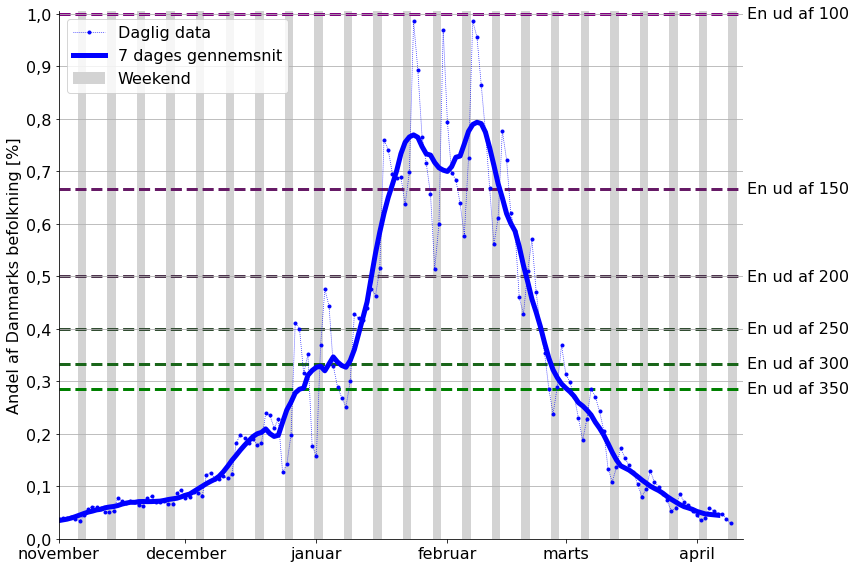

In [29]:
fig,ax1 = plt.subplots(tight_layout=True)

dkpop = 5831000

# ax1.plot(allDatesShift[:-1],100*allCases[:-1]/dkpop,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
ax1.plot(allDates[:-1],100*allCases[:-1]/dkpop,'b.:',markersize=6,linewidth=0.75,label='Daglig data')
ax1.plot(rnTime(allDates[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'b',linewidth=5,label=f'{meanWidth} dages gennemsnit')


# ax1.plot(allDatesShift,allCases,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift,meanWidth),rnMean(allCases,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
# ax1.plot(allDates,allCases,'b.:',markersize=4,linewidth=0.5,label='2021/2022')
# ax1.plot(rnTime(allDates,meanWidth),rnMean(allCases,meanWidth),'b',label=f'2021/2022, {meanWidth} dages gennemsnit')

ax1.legend(loc='upper left')
# ax1.grid()
ax1.set_ylabel('Andel af Danmarks befolkning [%]')
ax1.set_ylim(bottom=0)
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)


# Show fractional numbers
# fracsToShow = np.arange(2,11)
# fracsToShow = [50,100,150,200,250,300]
fracsToShow = [100,150,200,250,300,350]

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","xkcd:mauve","green"],len(fracsToShow))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","green"],len(fracsToShow))

# curFrac = 100/7
# for curFrac in fracsToShow:
for i in range(len(fracsToShow)):
     curFrac = fracsToShow[i]
     curLabel = f'En ud af {curFrac}'
     # ax.plot([firstDate,lastDate],[100/curFrac,100/curFrac],':',color=cmap(i),label=curLabel)
     # ax1.axhline(100/curFrac,linestyle='--',color=cmap(i),label=curLabel,zorder=0)
     ax1.axhline(100/curFrac,linestyle='--',color=cmap(i),zorder=0)
     ax1.text(lastDate+np.timedelta64(1,'D'),100/curFrac,curLabel,fontsize=16,va='center')


# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(-numWeeks,numWeeks):
     curSunday = firstSunday + np.timedelta64(7*k,'D')
     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax1.grid(axis='y')
ax1.legend(loc='upper left')


ax1.set_xticks(np.arange(np.datetime64('2021-11'),np.datetime64('2022-06')))
# ax1.set_xlim(left=np.datetime64('2021-11-01'),right=np.datetime64('2022-04-01'))
ax1.set_xlim(left=np.datetime64('2021-11-01'),right=lastDate)

ax1.set_ylim(top=1.005)
curYticks = np.arange(0,1.1,0.1)
ax1.set_yticks(curYticks)
ax1.set_yticklabels([str(np.round(x*10)/10).replace('.',',') for x in curYticks])

# plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/PositiveAfPopulation')


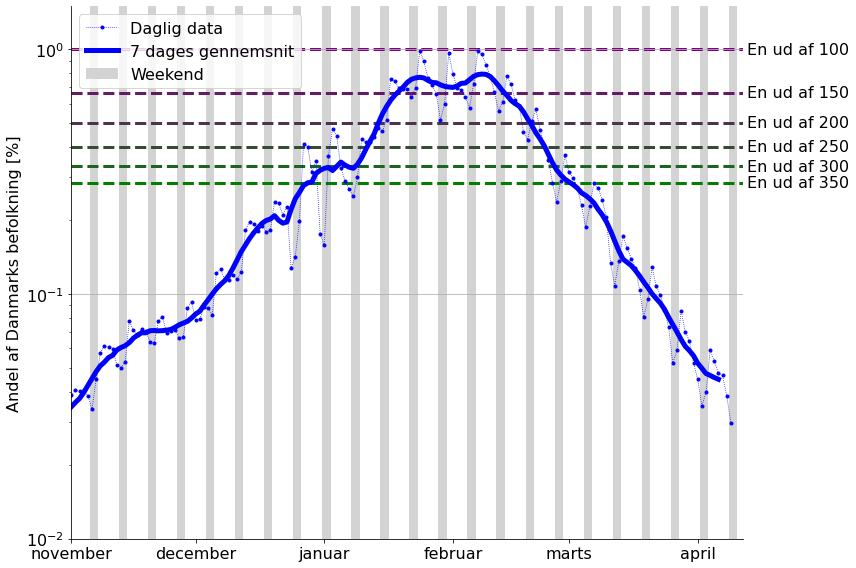

In [30]:

allCases = dfCase.NewPositive.values

fig,ax1 = plt.subplots(tight_layout=True)

dkpop = 5831000

# ax1.plot(allDatesShift[:-1],100*allCases[:-1]/dkpop,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
ax1.plot(allDates[:-1],100*allCases[:-1]/dkpop,'b.:',markersize=6,linewidth=0.75,label='Daglig data')
ax1.plot(rnTime(allDates[:-1],meanWidth),rnMean(100*allCases[:-1]/dkpop,meanWidth),'b',linewidth=5,label=f'{meanWidth} dages gennemsnit')


# ax1.plot(allDatesShift,allCases,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift,meanWidth),rnMean(allCases,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
# ax1.plot(allDates,allCases,'b.:',markersize=4,linewidth=0.5,label='2021/2022')
# ax1.plot(rnTime(allDates,meanWidth),rnMean(allCases,meanWidth),'b',label=f'2021/2022, {meanWidth} dages gennemsnit')

ax1.legend(loc='upper left')
# ax1.grid()
ax1.set_ylabel('Andel af Danmarks befolkning [%]')
ax1.set_ylim(bottom=0)
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)


# Show fractional numbers
# fracsToShow = np.arange(2,11)
# fracsToShow = [50,100,150,200,250,300]
# fracsToShow = [30,40,50,100,150,200,250,300]
fracsToShow = [100,150,200,250,300,350]

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","xkcd:mauve","green"],len(fracsToShow))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","green"],len(fracsToShow))

# curFrac = 100/7
# for curFrac in fracsToShow:
for i in range(len(fracsToShow)):
     curFrac = fracsToShow[i]
     curLabel = f'En ud af {curFrac}'
     # ax.plot([firstDate,lastDate],[100/curFrac,100/curFrac],':',color=cmap(i),label=curLabel)
     # ax1.axhline(100/curFrac,linestyle='--',color=cmap(i),label=curLabel,zorder=0)
     ax1.axhline(100/curFrac,linestyle='--',color=cmap(i),zorder=0)
     ax1.text(lastDate+np.timedelta64(1,'D'),100/curFrac,curLabel,fontsize=16,va='center')


# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(-numWeeks,numWeeks):
     curSunday = firstSunday + np.timedelta64(7*k,'D')
     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax1.grid(axis='y')
ax1.legend(loc='upper left')


ax1.set_xticks(np.arange(np.datetime64('2021-11'),np.datetime64('2022-05')))
# ax1.set_xlim(left=np.datetime64('2021-11-01'),right=np.datetime64('2022-04-01'))
ax1.set_xlim(left=np.datetime64('2021-11-01'),right=lastDate)

# ax1.set_ylim(top=1.005)
# curYticks = np.arange(0,1.1,0.1)
ax1.set_ylim(top=.105)
curYticks = np.arange(0,1.1,0.1)
ax1.set_yticks(curYticks)
ax1.set_yticklabels([str(np.round(x*10)/10).replace('.',',') for x in curYticks])

plt.yscale('log')
plt.ylim([0.01,1.5])

if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/PositiveAfPopulation_Logaritmisk')


# Different measures

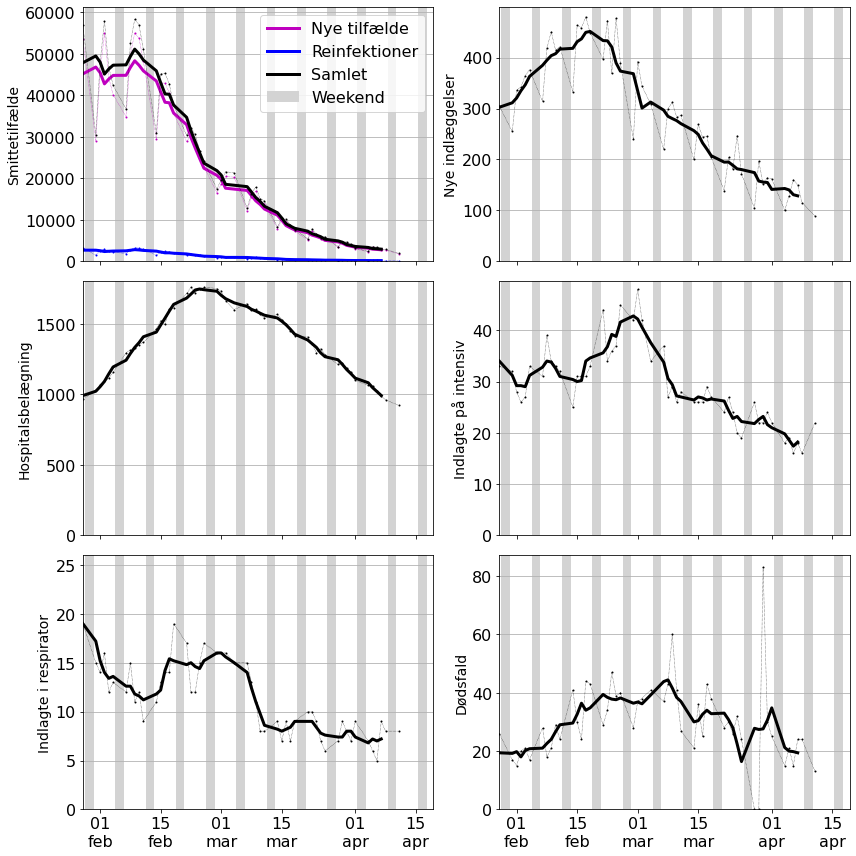

In [31]:
keyDates = dfKeyFull.Date


# colsToShow = ['Antal nye bekræftede tilfælde','Antal nye indlæggelser','Antal indlagte i dag med COVID','Antal indlagt i dag på intensiv','Antal indlagt i dag og i respirator','Antal nye døde']
colsToShow = ['New_Admissions','Hospitalizations','ICU','Respirator','Deaths']
labelsToUse = ['Nye indlæggelser','Hospitalsbelægning','Indlagte på intensiv','Indlagte i respirator','Dødsfald']

firstDate = np.datetime64('2022-01-25')

mw = 5

fig,allAxes = plt.subplots(3,2,figsize=(12,12),sharex=True,tight_layout=True)

# Manually show re-infections and new infections
ax = allAxes[0,0]
dataNew = dfKeyFull['Cases_New']
dataReIn = dfKeyFull['Cases_Reinfection']

plotDates = keyDates[keyDates > firstDate]
curData = dataNew[keyDates > firstDate]
ax.plot(plotDates,curData,'m.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'m',label='Nye tilfælde')

curData = dataReIn[keyDates > firstDate]
ax.plot(plotDates,curData,'b.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'b',label='Reinfektioner')
# ax.plot(dfKeyFull.Date,dfKeyFull.Cases_Reinfection,label='Reinfections, noegletal-file')

curData = dataNew[keyDates > firstDate].values + dataReIn[keyDates > firstDate].values
ax.plot(plotDates,curData,'k.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'k',label='Samlet')


# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 50
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax.grid(axis='y')


ax.set_ylim(bottom=0)
ax.set_ylabel('Smittetilfælde',fontsize=14)
ax.legend()

for k in range(1,len(allAxes.flatten())):
    ax = allAxes.flatten()[k]
    curCol = colsToShow[k-1]
    curLabel = labelsToUse[k-1]

    curData = dfKeyFull[curCol]
    plotDates = keyDates[keyDates > firstDate]
    curData = curData[keyDates > firstDate]
    ax.plot(plotDates,curData,'k.:',linewidth=0.5,markersize=2)
    ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'k')

    ax.set_ylim(bottom=0)
    ax.set_ylabel(curLabel,fontsize=14)

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 50
    for k in range(-numWeeks,numWeeks):
        curSunday = firstSunday + np.timedelta64(7*k,'D')
        ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')

    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_xlim(left=firstDate+np.timedelta64(int(np.ceil(mw/2)),'D'))
ax.set_xlim(right=np.datetime64('today')+np.timedelta64(7,'D'))


if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/AlleNoegletalSpring')



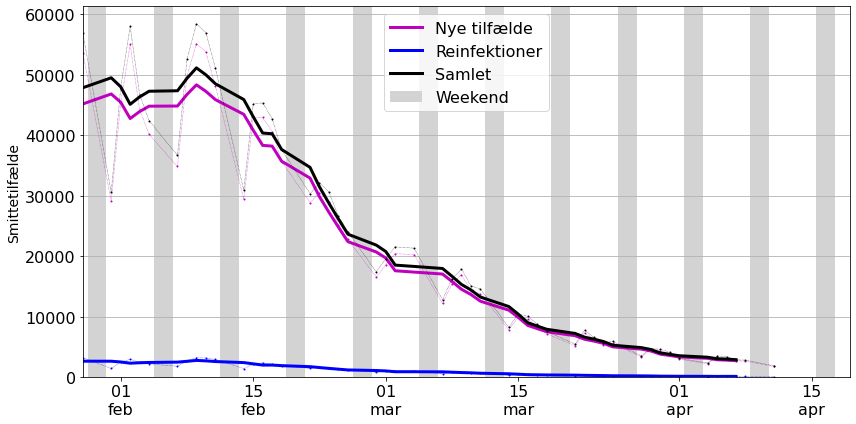

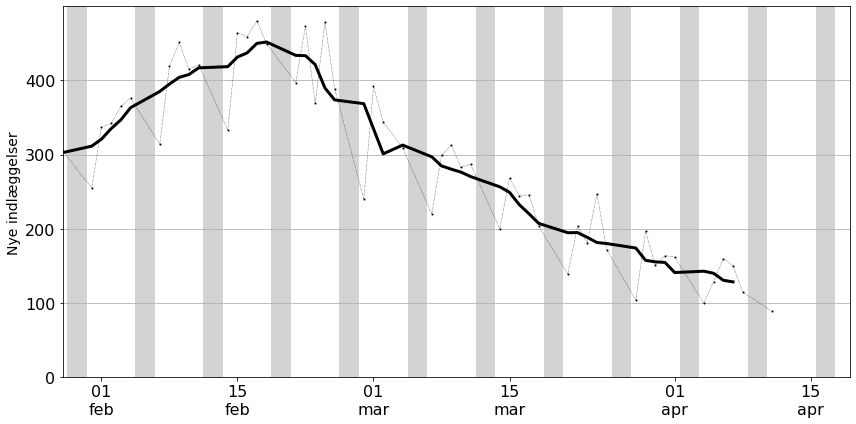

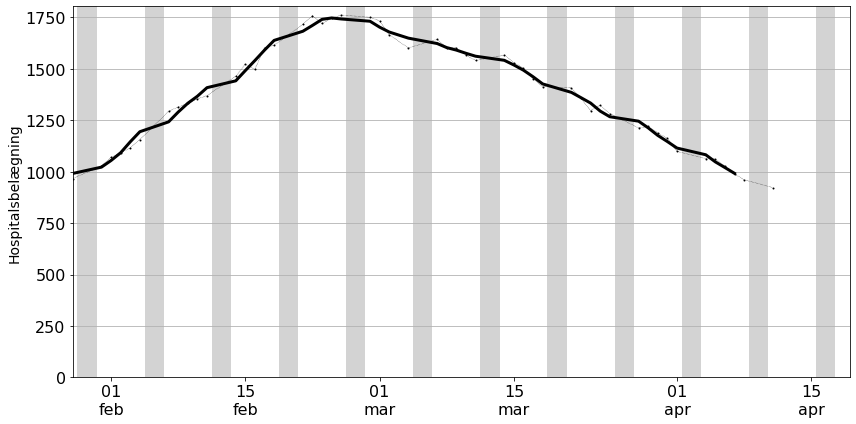

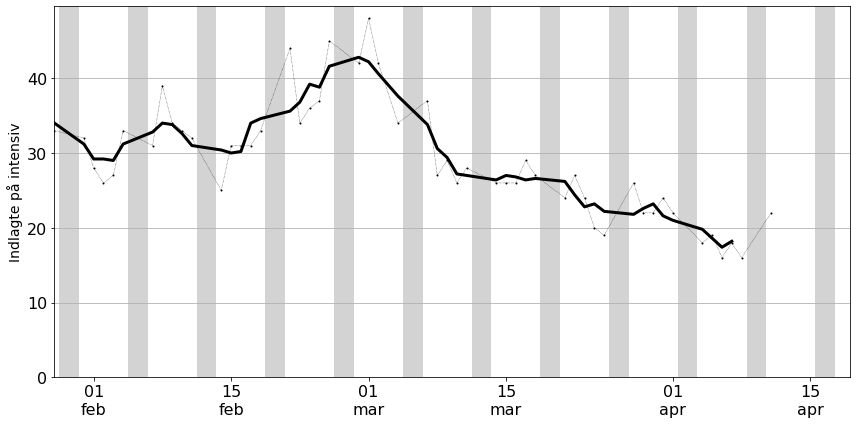

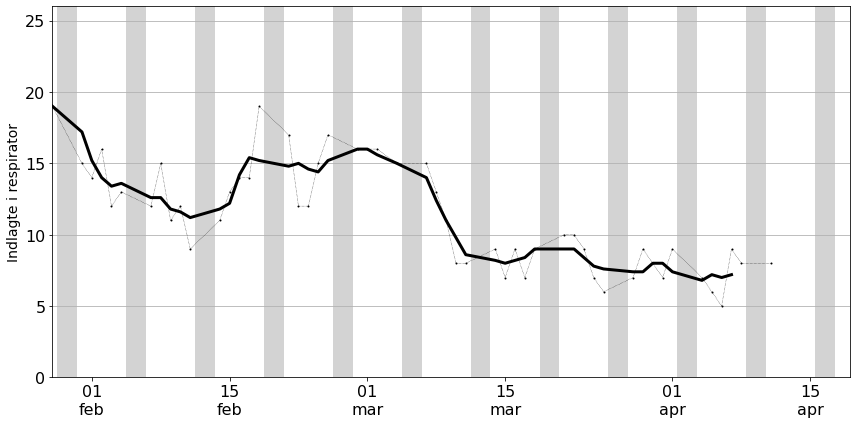

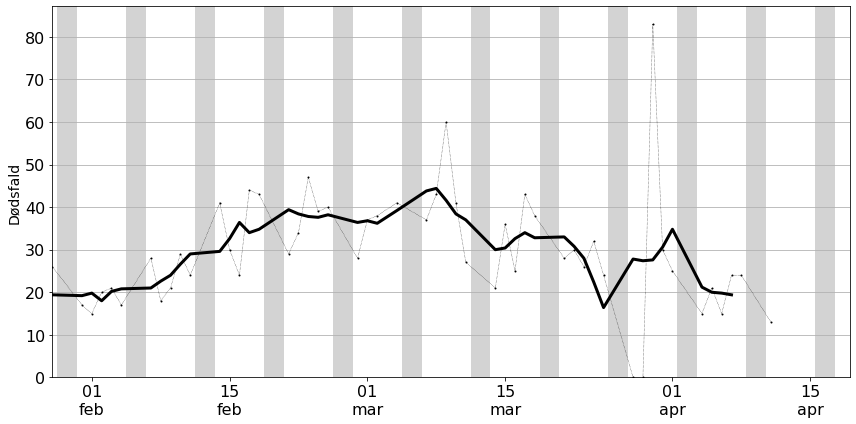

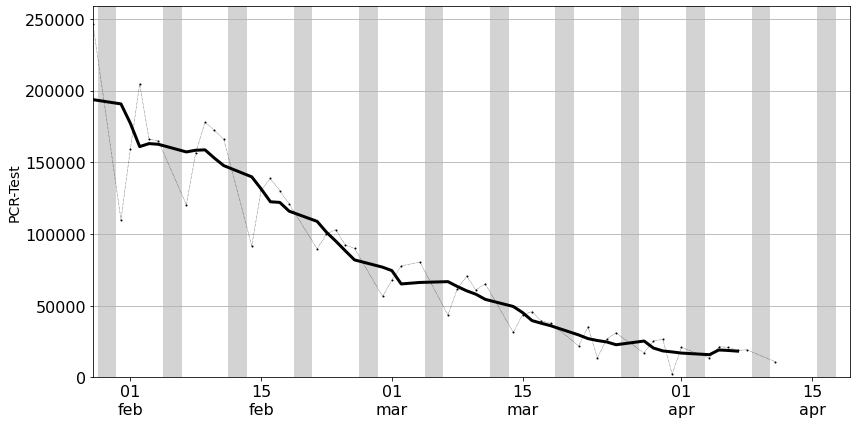

In [32]:
keyDates = dfKeyFull.Date


# colsToShow = ['Antal nye bekræftede tilfælde','Antal nye indlæggelser','Antal indlagte i dag med COVID','Antal indlagt i dag på intensiv','Antal indlagt i dag og i respirator','Antal nye døde']
# colsToShow = ['New_Admissions','Hospitalizations','ICU','Respirator','Deaths']
# labelsToUse = ['Nye indlæggelser','Hospitalsbelægning','Indlagte på intensiv','Indlagte i respirator','Dødsfald']
# filenames = ['NewAdmissions','CurrentAdmissions','ICU','Respirator','Deaths']
colsToShow = ['New_Admissions','Hospitalizations','ICU','Respirator','Deaths','Tests']
labelsToUse = ['Nye indlæggelser','Hospitalsbelægning','Indlagte på intensiv','Indlagte i respirator','Dødsfald','PCR-Test']
filenames = ['NewAdmissions','CurrentAdmissions','ICU','Respirator','Deaths','Tests']

# firstDate = np.datetime64('2021-10-25')
# # firstDate = np.datetime64('2021-11-25')

# mw = 7

# fig,allAxes = plt.subplots(3,2,figsize=(12,12),sharex=True,tight_layout=True)
fig,ax = plt.subplots(1,1,figsize=(12,6),tight_layout=True)

# Manually show re-infections and new infections
# ax = allAxes[0,0]
dataNew = dfKeyFull['Cases_New']
dataReIn = dfKeyFull['Cases_Reinfection']

plotDates = keyDates[keyDates > firstDate]
curData = dataNew[keyDates > firstDate]
ax.plot(plotDates,curData,'m.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'m',label='Nye tilfælde')

curData = dataReIn[keyDates > firstDate]
ax.plot(plotDates,curData,'b.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'b',label='Reinfektioner')
# ax.plot(dfKeyFull.Date,dfKeyFull.Cases_Reinfection,label='Reinfections, noegletal-file')

curData = dataNew[keyDates > firstDate].values + dataReIn[keyDates > firstDate].values
ax.plot(plotDates,curData,'k.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'k',label='Samlet')


# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 50
for k in range(-numWeeks,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax.grid(axis='y')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.set_xlim(left=firstDate+np.timedelta64(int(np.ceil(mw/2)),'D'))
ax.set_xlim(right=np.datetime64('today')+np.timedelta64(7,'D'))

ax.set_ylim(bottom=0)
ax.set_ylabel('Smittetilfælde',fontsize=14)
ax.legend()


if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/SpringCases')


# for k in range(1,len(allAxes.flatten())):
for k in range(1,len(colsToShow)+1):
    fig,ax = plt.subplots(1,1,figsize=(12,6),tight_layout=True)
    # ax = allAxes.flatten()[k]
    curCol = colsToShow[k-1]
    curLabel = labelsToUse[k-1]

    curData = dfKeyFull[curCol]
    plotDates = keyDates[keyDates > firstDate]
    curData = curData[keyDates > firstDate]
    ax.plot(plotDates,curData,'k.:',linewidth=0.5,markersize=2)
    ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'k')

    ax.set_ylim(bottom=0)
    ax.set_ylabel(curLabel,fontsize=14)

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 50
    for w in range(-numWeeks,numWeeks):
        curSunday = firstSunday + np.timedelta64(7*w,'D')
        ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(w==0)*'Weekend')
    ax.grid(axis='y')

    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax.set_xlim(left=firstDate+np.timedelta64(int(np.ceil(mw/2)),'D'))
    ax.set_xlim(right=np.datetime64('today')+np.timedelta64(7,'D'))


    if saveFigures:
        plt.savefig(path_figs+'CurrentStatus/Spring'+filenames[k-1])



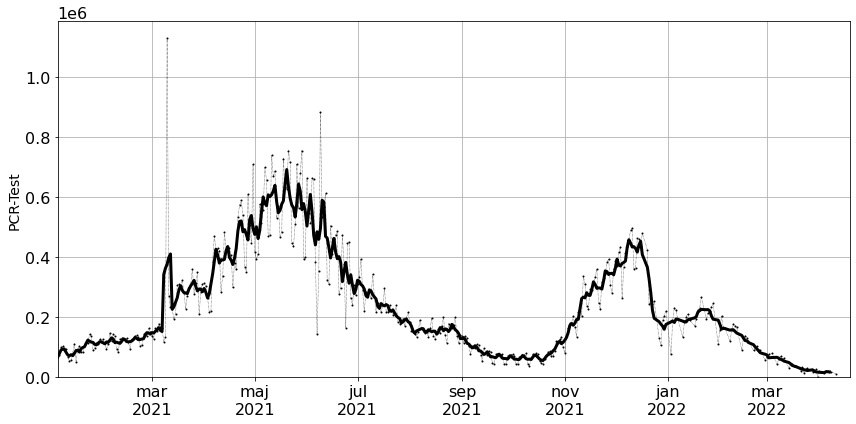

In [33]:

fig,ax = plt.subplots(1,1,figsize=(12,6),tight_layout=True)
# ax = allAxes.flatten()[k]
curCol = colsToShow[-1]
curLabel = labelsToUse[-1]

curData = dfKeyFull[curCol]
curFirstDate = np.datetime64('2021-01-01')
plotDates = keyDates[keyDates > curFirstDate]
curData = curData[keyDates > curFirstDate]
ax.plot(plotDates,curData,'k.:',linewidth=0.5,markersize=2)
ax.plot(rnTime(plotDates,mw),rnMean(curData,mw),'k')

ax.set_ylim(bottom=0)
ax.set_ylabel(curLabel,fontsize=14)

# # Draw weekends
# firstSunday = np.datetime64('2021-10-03')
# numWeeks = 50
# for w in range(-numWeeks,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*w,'D')
#     ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(w==0)*'Weekend')
# ax.grid(axis='y')

ax.grid()

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.set_xlim(left=curFirstDate+np.timedelta64(int(np.ceil(mw/2)),'D'))
ax.set_xlim(right=np.datetime64('today')+np.timedelta64(7,'D'))


if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/TestsTotal')



# Relative to max

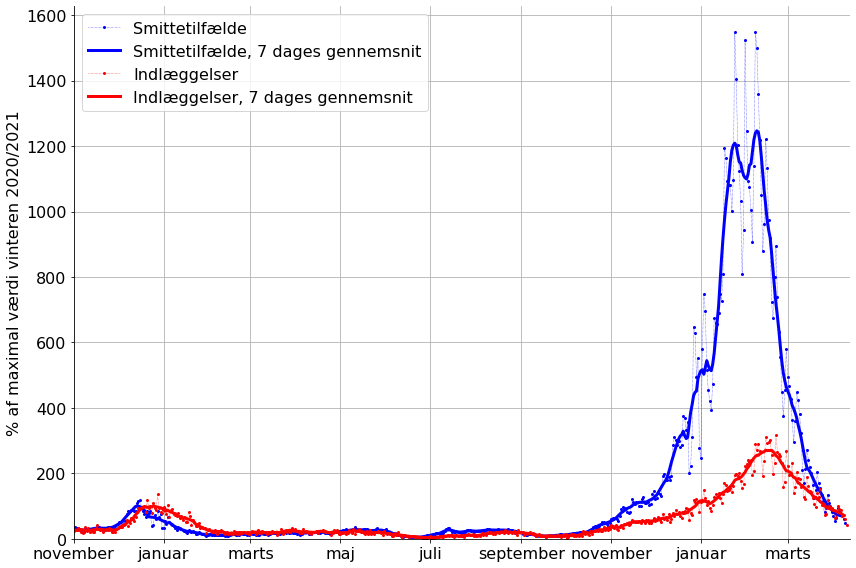

In [34]:

allCases = dfCase.NewPositive.values

fig,ax1 = plt.subplots(tight_layout=True)

cases2021 = allCases[allDates < np.datetime64('2021-03-01')]
max2021Cases = np.max(rnMean(cases2021,meanWidth))


ax1.plot(allDates[:-1],100*allCases[:-1]/max2021Cases,'b.:',markersize=4,linewidth=0.5,label='Smittetilfælde')
ax1.plot(rnTime(allDates[:-1],meanWidth),100*rnMean(allCases[:-1],meanWidth)/max2021Cases,'b',label=f'Smittetilfælde, {meanWidth} dages gennemsnit')

allAdms = dfAdm.Total.values
allAdms = dfAdm.Total
Adms2021 = allAdms[allDates < np.datetime64('2021-03-01')]
max2021Adms = np.max(rnMean(Adms2021,meanWidth))


# ax1.plot(allDatesAdmShift,allAdms,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesAdmShift,meanWidth),rnMean(allAdms,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
ax1.plot(allDatesAdm,100*allAdms/max2021Adms,'r.:',markersize=4,linewidth=0.5,label='Indlæggelser')
ax1.plot(rnTime(allDatesAdm,meanWidth),100*rnMean(allAdms,meanWidth)/max2021Adms,'r',label=f'Indlæggelser, {meanWidth} dages gennemsnit')



# ax1.plot(allDatesShift,allCases,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift,meanWidth),rnMean(allCases,meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
# ax1.plot(allDates,allCases,'b.:',markersize=4,linewidth=0.5,label='2021/2022')
# ax1.plot(rnTime(allDates,meanWidth),rnMean(allCases,meanWidth),'b',label=f'2021/2022, {meanWidth} dages gennemsnit')

ax1.legend(loc='upper left')
ax1.grid()
ax1.set_ylabel('% af maximal værdi vinteren 2020/2021')
ax1.set_ylim(bottom=0)
firstDate = np.datetime64('2020-11-01')
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)


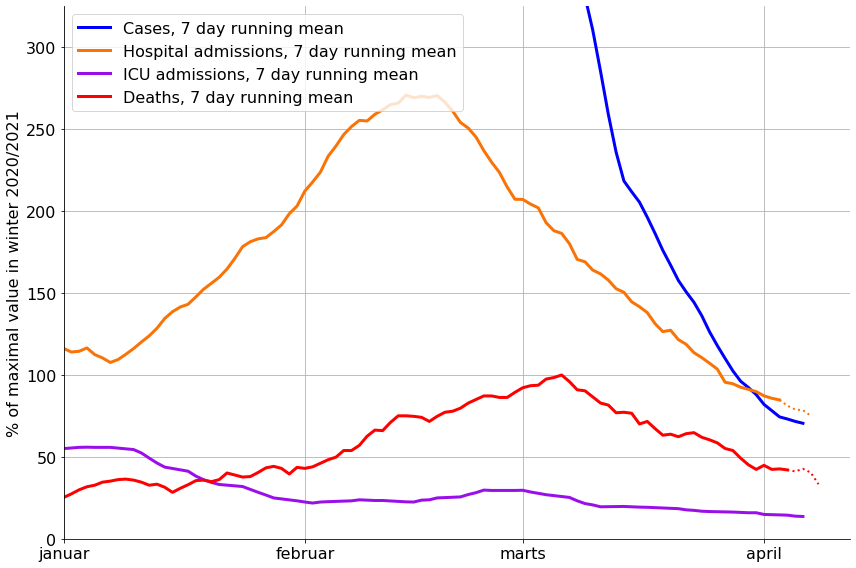

In [35]:

allCases = dfCase.NewPositive.values

fig,ax1 = plt.subplots(tight_layout=True)

cases2021 = allCases[allDates < np.datetime64('2021-03-01')]
max2021Cases = np.max(rnMean(cases2021,meanWidth))

# ax1.plot(allDatesShift[:-1],allCases[:-1],'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift[:-1],meanWidth),rnMean(allCases[:-1],meanWidth),'k',label=f'2020/2021, {meanWidth} day running mean')


# ax1.plot(allDates[:-1],100*allCases[:-1]/max2021Cases,'b.:',markersize=4,linewidth=0.5,label='Smittetilfælde')
ax1.plot(rnTime(allDates[:-1],meanWidth),100*rnMean(allCases[:-1],meanWidth)/max2021Cases,'b',label=f'Cases, {meanWidth} day running mean')

allAdms = dfAdm.Total.values
allAdms = dfAdm.Total
Adms2021 = allAdms[allDates < np.datetime64('2021-03-01')]
max2021Adms = np.max(rnMean(Adms2021,meanWidth))


# ax1.plot(allDatesAdmShift,allAdms,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesAdmShift,meanWidth),rnMean(allAdms,meanWidth),'k',label=f'2020/2021, {meanWidth} day running mean')
# ax1.plot(allDatesAdm,100*allAdms/max2021Adms,'r.:',markersize=4,linewidth=0.5,label='Indlæggelser')
# ax1.plot(rnTime(allDatesAdm,meanWidth),100*rnMean(allAdms,meanWidth)/max2021Adms,'xkcd:orange',label=f'Hospital admissions, {meanWidth} day running mean')
curDates = rnTime(allDatesAdm,meanWidth)
curCount = 100*rnMean(allAdms,meanWidth)/max2021Adms
ax1.plot(curDates[:-4],curCount[:-4],'xkcd:orange',label=f'Hospital admissions, {meanWidth} day running mean')
ax1.plot(curDates[-5:],curCount[-5:],'xkcd:orange',linestyle=':',linewidth=2)


# allAdms = keyAdmInt.Total.values
allAdmsInt = keyAdmInt
Adms2021Int = allAdmsInt[keyDates < np.datetime64('2021-03-01')]
max2021AdmsInts = np.max(rnMean(keyAdmInt,meanWidth))

# keyAdmInt
# keyDates

# ax1.plot(allDatesAdmShift,allAdms,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesAdmShift,meanWidth),rnMean(allAdms,meanWidth),'k',label=f'2020/2021, {meanWidth} day running mean')
# ax1.plot(allDatesAdm,100*allAdms/max2021Adms,'r.:',markersize=4,linewidth=0.5,label='Indlæggelser')
# ax1.plot(rnTime(keyDates,meanWidth),100*rnMean(allAdmsInt,meanWidth)/max2021AdmsInts,'xkcd:violet',label=f'ICU admissions, {meanWidth} day running mean')
curDates = rnTime(keyDates,meanWidth)
curCount = 100*rnMean(allAdmsInt,meanWidth)/max2021AdmsInts
# ax1.plot(curDates[-4:],curCount[-4:],'xkcd:violet',linestyle='--')
# ax1.plot(curDates[:-4],curCount[:-4],'xkcd:violet',label=f'ICU admissions, {meanWidth} day running mean')
ax1.plot(curDates,curCount,'xkcd:violet',label=f'ICU admissions, {meanWidth} day running mean')


# allAdms = keyAdmInt.Total.values
allDeas2 = allDeas
Dea2021Int = allDeas2[allDatesDea < np.datetime64('2021-03-01')]
max2021DeaInts = np.max(rnMean(allDeas,meanWidth))

# ax1.plot(rnTime(allDatesDeaShift[:-1],meanWidth),rnMean(allDeas[:-1],meanWidth),'k',label=f'2020/2021, {meanWidth} dages gennemsnit')
# ax1.plot(rnTime(allDatesDea,meanWidth),100*rnMean(allDeas2,meanWidth)/max2021DeaInts,'r',label=f'Deaths, {meanWidth} day running mean')
curDates = rnTime(allDatesDea,meanWidth)
curCount = 100*rnMean(allDeas2,meanWidth)/max2021DeaInts
ax1.plot(curDates[:-4],curCount[:-4],'r',label=f'Deaths, {meanWidth} day running mean')
ax1.plot(curDates[-5:],curCount[-5:],'r',linestyle=':',linewidth=2)



# ax1.plot(allDatesShift,allCases,'k.:',markersize=4,linewidth=0.5,label='2020/2021')
# ax1.plot(rnTime(allDatesShift,meanWidth),rnMean(allCases,meanWidth),'k',label=f'2020/2021, {meanWidth} day running mean')
# ax1.plot(allDates,allCases,'b.:',markersize=4,linewidth=0.5,label='2021/2022')
# ax1.plot(rnTime(allDates,meanWidth),rnMean(allCases,meanWidth),'b',label=f'2021/2022, {meanWidth} day running mean')

ax1.legend(loc='upper left')
ax1.grid()
ax1.set_ylabel('% of maximal value in winter 2020/2021')
ax1.set_ylim(bottom=0)
firstDate = np.datetime64('2020-11-01')
curXticks = np.arange(np.datetime64('2020-11'),np.datetime64('2022-11'))
ax1.set_xticks(curXticks)
ax1.set_xlim([firstDate,lastDate])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)

if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/CompareWithMax_Full')
#     plt.savefig(path_figs+'CurrentStatus/CasesHospCompare_English2')

# maxAvg = np.max(rnMean(allCases,meanWidth))
# ax1.set_ylim(top=maxAvg*1.1)

firstDate = np.datetime64('2021-11-01')
ax1.set_xlim([firstDate,lastDate])
# ax1.set_xlim([firstDate,np.datetime64('2022-04-01')])

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/CompareWithMax')
    
ax1.set_ylim(top=np.max(100*rnMean(allAdms,meanWidth)/max2021Adms)*1.2)
    
if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/CompareWithMax_zoom')

    
ax1.set_xlim(left=np.datetime64('2022-01-01'))
if saveFigures:
    plt.savefig(path_figs+'CurrentStatus/CompareWithMax_zoom_spring')